In [1]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
venues = json.load(open('../data/json/dim/all/relevant_venues_v3.json'))

In [3]:
cnt = Counter(venues.values())

In [4]:
cnt.most_common(5)

[('Sonderforschungsbereich 649: Ökonomisches Risiko', 809),
 ('Sonderforschungsbereich 373: Quantification and Simulation of Economic Processes',
  583),
 ('PLoS ONE', 533),
 ('Scientific Reports', 367),
 ('Preprints aus dem Institut für Mathematik', 314)]

In [5]:
print(f'{cnt[None]} publications don\'t have a venue ({round(cnt[None] / len(venues), 2)}).')

292 publications don't have a venue (0.02).


In [6]:
tu_total = sum(['depositonce' in pub for pub in venues])
hu_total = sum(['edoc' in pub for pub in venues])
fu_total = sum(['refubium' in pub for pub in venues])
tu_total, hu_total, fu_total

(4162, 4823, 9649)

136 out of 4162 (0.03) TU publications do not have a venue.
97 out of 4823 (0.02) HU publications do not have a venue.
59 out of 9649 (0.01) FU publications do not have a venue.


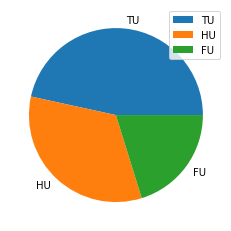

In [7]:
tu_none, hu_none, fu_none = 0, 0, 0
for pub, venue in venues.items():
    if venue is None:
        if 'depositonce' in pub:
            tu_none += 1
        elif 'edoc' in pub:
            hu_none += 1
        elif 'refubium' in pub:
            fu_none += 1
        else:
            raise Exception
print(f'{tu_none} out of {tu_total} ({round(tu_none/tu_total, 2)}) TU publications do not have a venue.')
print(f'{hu_none} out of {hu_total} ({round(hu_none/hu_total, 2)}) HU publications do not have a venue.')
print(f'{fu_none} out of {fu_total} ({round(fu_none/fu_total, 2)}) FU publications do not have a venue.')
plt.pie([tu_none, hu_none, fu_none], labels=['TU', 'HU', 'FU'])
plt.legend()
plt.show()

In [8]:
print('Examples of publications without a venue: ')
i_tu, i_hu, i_fu = 0, 0, 0
for pub, venue in venues.items():
    if venue is None:
        if 'depositonce' in pub:
            if i_tu < 3:
                i_tu += 1
                print(pub)
        elif 'edoc' in pub:
            if i_hu < 3:
                i_hu += 1
                print(pub)
        elif 'refubium' in pub:
            if i_fu < 3:
                i_fu += 1
                print(pub)
        else:
            raise Exception

Examples of publications without a venue: 
oai:depositonce.tu-berlin.de:11303/6208
oai:depositonce.tu-berlin.de:11303/9062
oai:depositonce.tu-berlin.de:11303/5240
oai:edoc.hu-berlin.de:18452/22922
oai:edoc.hu-berlin.de:18452/19123
oai:edoc.hu-berlin.de:18452/14229
oai:refubium.fu-berlin.de:fub188/24659
oai:refubium.fu-berlin.de:fub188/28762
oai:refubium.fu-berlin.de:fub188/15635


### After the first run
The first one of depositonce was published in a series (element series, qualifier name). The second one as well. The first one is a research paper, the second a book and the third a preprint.<br>
The third one was published by the TU (element publisher, qualifier universityorinstitution), but the original publisher is stored in (element bibliograhicCitation, qualifier journaltitle) <br><br>
The first one of edoc has the faculty of the HU as the publisher (element publisher) and the research area as (element edoc, qualifier container-title). The second and third one follow the same pattern. The first two are books and the third one is an article. <br><br>
The first one of refubium has the journal in (element bibliographicCitation) as "Al-Qanṭara. - 37 (2016), 2, S. 399-422". The second and third ones have it in the same place and same format. All three are articles.

### After the second run
The first one of depositonce has a TUB series element (element series, qualifier name). The second one as well. The third one is a preprint: it has not been published yet.<br>
The first and third ones of edoc only has the HU as the publisher. The second one as well, but it also has an erstkat-ID (element edoc, qualifier container-erstkatid).<br>
The three from refubium have a series (element series, qualifer name).

### Erstkat-ID in edoc
Der Attributwert "Erstkat-ID" bezeichnet die Identifikationsnummer des ersterfassenden
Verbundes oder der ZDB. Die Angabe im Elementinhalt setzt sich zusammen aus Verbundkürzel,
Doppelpunkt und ID (https://d-nb.info/1217266461/34).


### After the third run

The first one of depositonce is a preprint and it doesn't have a venue. The second one is a report with the TU as the publisher but nothing else. The third one is a preprint without a venue.<br>
The first one of edoc is an article with the HU as the publisher and nothing else. The second one is an article with a erstkat ID. The third one is an article with no venue.<br>
The first of refubium is a book with no venue. The second and third one also don't have a venue.

### After the fourth run

depositonce and refubium seem to be good to go. Let's look at edoc.

The first and second ones of edoc are articles with the HU as the publisher and nothing else. The third one is a book also with the HU as the publisher.